In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
# reading embedding data
embed_dict = {}
embed_dim = 32
f = open("Data/embed_2020.emb")
line = f.readline()
print(line)
line = f.readline()
while line:
    words = line.split(' ')
    code = " ".join(words[:-embed_dim])
    tmp = []
    for value in words[-embed_dim:]:
        tmp.append(float(value))
    embed_dict[code] = tmp
    line = f.readline()
f.close()

2030 32



In [10]:
# load variable
f=open('Data/symbol_name.txt','rb')
symbol_name=pickle.load(f)
f.close()

In [12]:
symbol_name_dict = {}
for symbol1,symbol,name in symbol_name:
    symbol_name_dict[symbol] = (symbol1, name)

In [15]:
stock_symbol = list(symbol_name_dict.keys())

In [16]:
stock_embed = []
for value in stock_symbol:
    stock_embed.append(embed_dict[value])

In [19]:
np_embed_list = np.array(stock_embed)

array([[-0.0327641 ,  0.7827328 ,  0.1847112 , ...,  0.22044683,
         0.60854167,  0.63832414],
       [ 0.44992623,  1.1497066 ,  0.58796126, ..., -0.9658543 ,
        -0.07527886, -0.15370283],
       [ 0.2354385 , -0.327159  ,  0.15466972, ...,  0.33292076,
        -0.27789193, -0.390874  ],
       ...,
       [-0.22948188,  0.06363184,  0.43050998, ...,  0.13392618,
         0.29207838, -0.5953833 ],
       [ 1.6654665 ,  0.01845763, -0.20545357, ..., -0.01474794,
        -0.41998816,  0.6552534 ],
       [-0.0500903 ,  0.57380044,  0.82691264, ...,  0.22891359,
        -0.34357125,  0.42495093]])

In [53]:
stock_price_df = pd.read_csv('stock_price_2020.csv', index_col=0)

In [94]:
def get_n_closest_stock(target_code, n, stock_symbol, symbol_name_dict, np_embed_list, embed_dict):
    target_embed = np.array(embed_dict[target_code])
    diff = np_embed_list - target_embed
    diff_num = np.sum(diff * diff, axis = 1)
    min_index = np.argsort(diff_num)
    min_n_index = min_index[:n+1]
    closest_n_stock = []
    for i in min_n_index:
        stock_code = stock_symbol[i]
        #closest_n_stock.append([stock_code, symbol_name_dict[stock_code][1]])
        closest_n_stock.append(stock_code)
    return closest_n_stock

In [21]:
'002371' in embed_dict.keys()

True

In [93]:
target_code = "300601"
get_n_closest_stock(target_code, 20, stock_symbol, symbol_name_dict, np_embed_list, embed_dict)

[['300601', '康泰生物'],
 ['300529', '健帆生物'],
 ['300661', '圣邦股份'],
 ['600536', '中国软件'],
 ['600703', '三安光电'],
 ['300014', '亿纬锂能'],
 ['300457', '赢合科技'],
 ['300212', '易华录'],
 ['000661', '长春高新'],
 ['000725', '京东方A'],
 ['603986', '兆易创新'],
 ['000063', '中兴通讯'],
 ['300331', '苏大维格'],
 ['600276', '恒瑞医药'],
 ['600588', '用友网络'],
 ['300455', '康拓红外'],
 ['000938', '紫光股份'],
 ['300760', '迈瑞医疗'],
 ['603259', '药明康德'],
 ['000977', '浪潮信息'],
 ['300166', '东方国信']]

In [25]:
trading_day = list(set(stock_price_df['time']))
trading_day.sort()
trading_day

['2020-01-02',
 '2020-01-03',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-13',
 '2020-04-

In [27]:
trading_day.index('2020-04-22') # 72
len(trading_day) # 140

140

In [103]:
def simulate_trade(target,n,start=72,end=140):
    chosen_stock = get_n_closest_stock(target, n, stock_symbol, symbol_name_dict, np_embed_list, embed_dict)
    shares = []
    money = 100000
    total_money = money * len(chosen_stock)
    earn = []
    for value in chosen_stock:
        df = stock_price_df[stock_price_df['code'] == symbol_name_dict[value][0]]
        df = df.reset_index()
        price = df.loc[start,'open']
        shares.append(money/price)
    for j in range(start,end):
        print(j,end='\r',flush=True)
        tmp_earn = 0
        for i in range(len(chosen_stock)):
            value = chosen_stock[i]
            df = stock_price_df[stock_price_df['code'] == symbol_name_dict[value][0]]
            df = df.reset_index()
            price = df.loc[j,'open']
            tmp_earn += price * shares[i]
        earn.append((tmp_earn - total_money)/total_money)
    return earn
        

In [96]:
hushen300_df = pd.read_csv('hushen300_2020.csv', index_col=0)
zhongzheng500_df = pd.read_csv('zhongzheng500_2020.csv', index_col=0)
shangzheng50_df = pd.read_csv('shangzheng50_2020.csv', index_col=0)

In [97]:
def get_baseline(start = 72, end = 140):
    hushen300_array = []
    zhongzheng500_array = []
    shangzheng50_array = []
    time = trading_day[start]
    hushen300_base = hushen300_df.loc[time,'open']
    zhongzheng500_base = zhongzheng500_df.loc[time,'open']
    shangzheng50_base = shangzheng50_df.loc[time,'open']
    for i in range(start,end):
        print(i,end='\r',flush=True)
        time = trading_day[i]
        hushen300_array.append((hushen300_df.loc[time,'open'] - hushen300_base) / hushen300_base)
        zhongzheng500_array.append((zhongzheng500_df.loc[time,'open'] - zhongzheng500_base) / zhongzheng500_base)
        shangzheng50_array.append((shangzheng50_df.loc[time,'open'] - shangzheng50_base) / shangzheng50_base)
    return hushen300_array, zhongzheng500_array, shangzheng50_array

In [70]:
hushen300_array,zhongzheng500_array,shangzheng50_array = get_baseline()

In [104]:
def show_result(code):
    earn_20 = simulate_trade(code,20)
    earn_10 = simulate_trade(code,10)
    hushen300_array,zhongzheng500_array,shangzheng50_array = get_baseline()
    plt.plot(earn_20,label = str(code)+'_20')
    plt.plot(earn_10,label = str(code)+'_10')
    plt.plot(hushen300_array,label='300')
    plt.plot(zhongzheng500_array,label='500')
    plt.plot(shangzheng50_array,label='50')
    plt.legend()
    plt.show()

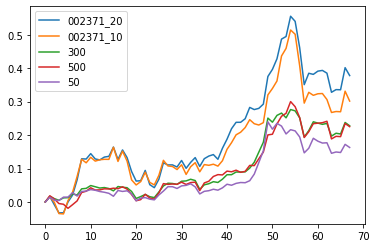

In [105]:
# 北方华创
show_result("002371")

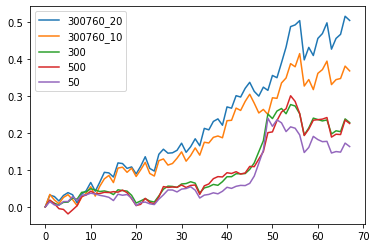

In [106]:
# 迈瑞医疗
show_result("300760")

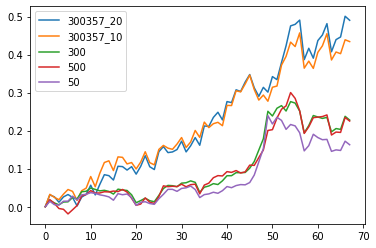

In [107]:
# 我武生物
show_result("300357")

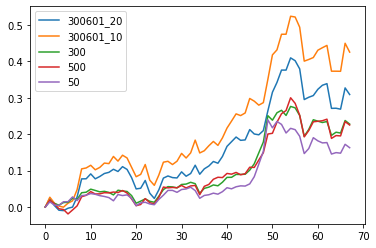

In [108]:
# 康泰生物
show_result("300601")